In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-loan-approval/loan_sanction_test.csv
/kaggle/input/home-loan-approval/loan_sanction_train.csv


### Load Dataset

In [2]:
home_train = pd.read_csv("/kaggle/input/home-loan-approval/loan_sanction_train.csv", index_col = 0)
home_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data types

In [3]:
home_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
home_train['ApplicantIncome'] = home_train['ApplicantIncome'].astype('float')

### Check for missing data

In [5]:
home_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Replace 3+ with 3

In [6]:
home_train["Dependents"] = home_train["Dependents"].replace('3+',3)

### Replace missing values in Loan Amount Term with its mean

In [7]:
term_avg = home_train['Loan_Amount_Term'].mean()
home_train['Loan_Amount_Term'].replace(np.NaN, term_avg, inplace = True)

### Drop missing data

In [8]:
home_train.dropna(inplace = True)
home_train.shape

(492, 12)

In [9]:
home_train['Dependents'] = home_train['Dependents'].astype(int)

### Split data into numerical and categorical variables

In [10]:
numerical_col = home_train.select_dtypes([np.number]).columns
categorical_col = home_train.select_dtypes('object').drop(['Loan_Status'],axis=1).columns
print(numerical_col)
print(categorical_col)

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')


### Plot numerical columns distribution

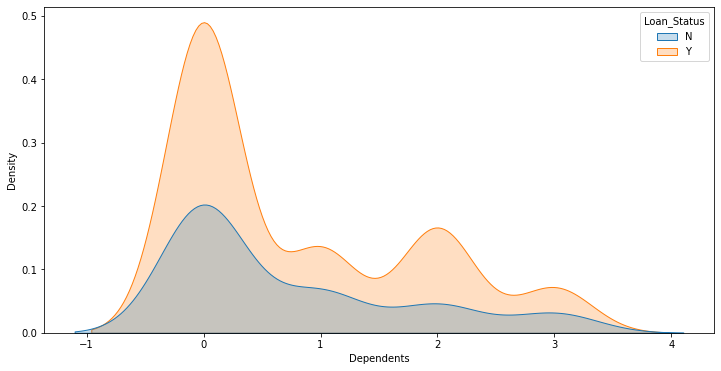

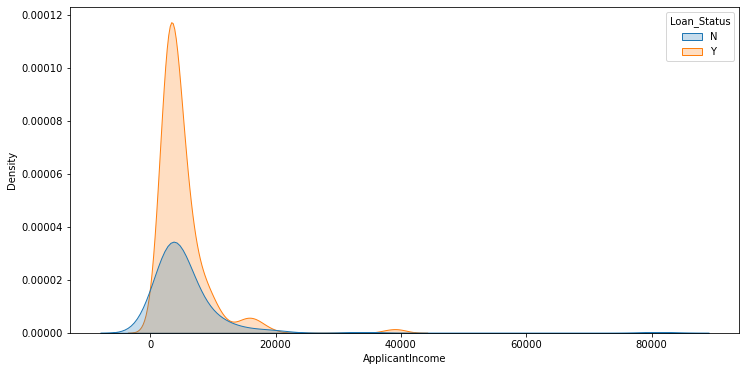

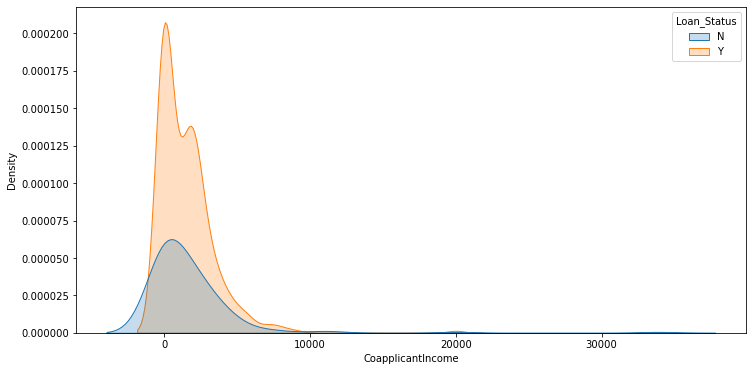

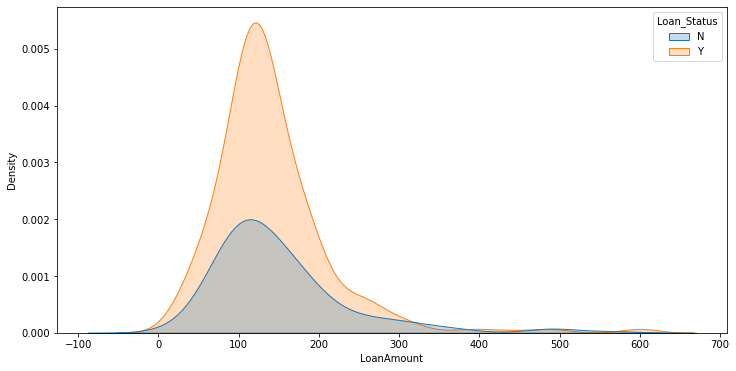

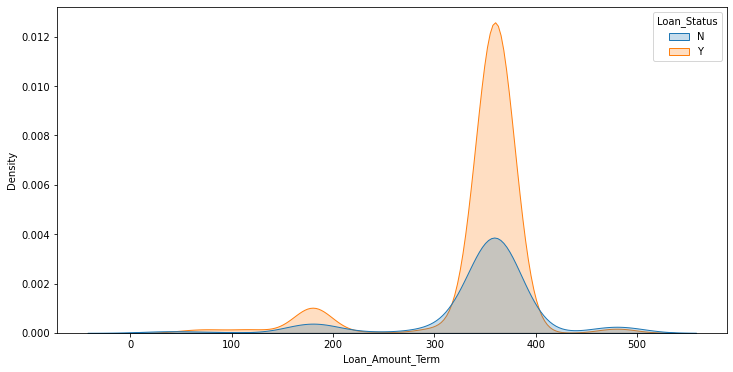

In [11]:
for col in numerical_col:
    if col=='Credit_History':
        continue
    plt.figure(figsize=(12,6))
    sns.kdeplot(data=home_train,x=col,hue='Loan_Status',shade=True)
    plt.show()

### Plot categorical columns

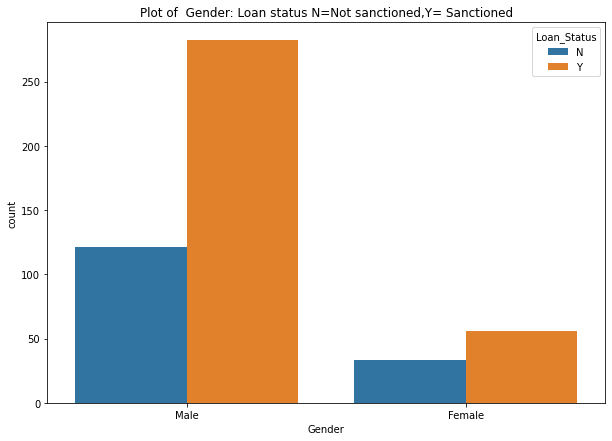

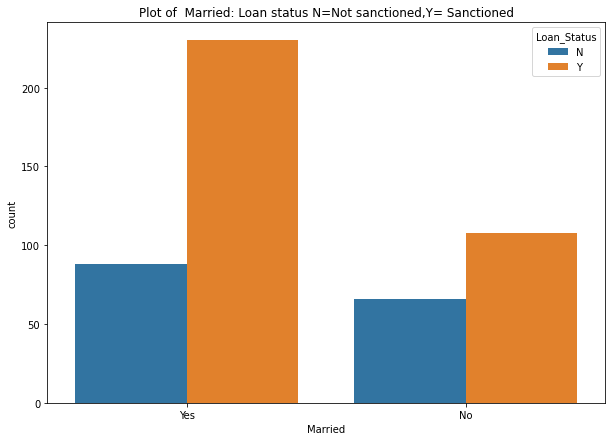

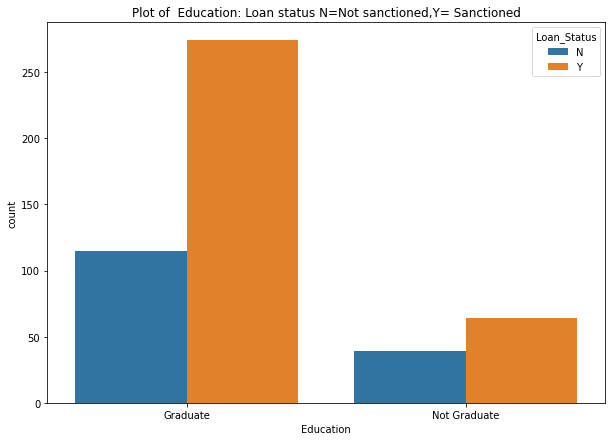

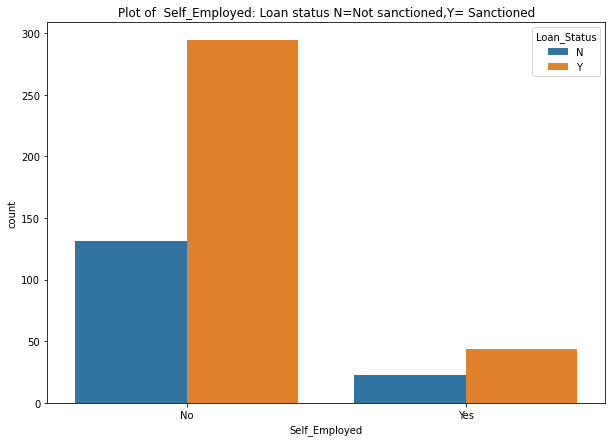

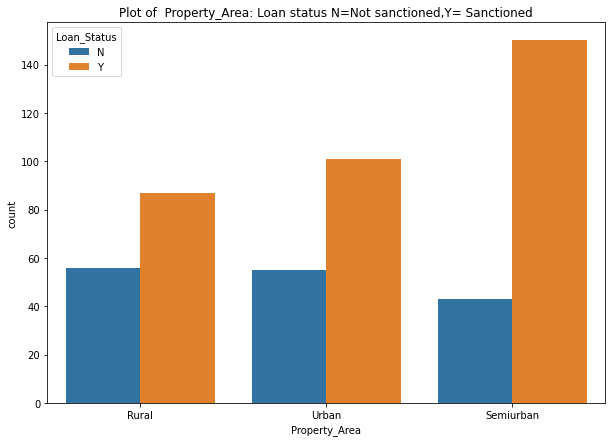

In [12]:
for col in categorical_col:
    plt.figure(figsize=(10,7))
    sns.countplot(data=home_train,x=col,hue='Loan_Status')
    plt.title('Plot of  '+col+': Loan status N=Not sanctioned,Y= Sanctioned')
    plt.show()

### Data preprocesssing

In [13]:
home_train= pd.get_dummies(data = home_train, columns=['Gender', 'Dependents', 'Education',
                                                         'Property_Area'])
home_train.head()

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,,
LP001003,Yes,No,4583.0,1508.0,128.0,360.0,1.0,N,0,1,0,1,0,0,1,0,1,0,0
LP001005,Yes,Yes,3000.0,0.0,66.0,360.0,1.0,Y,0,1,1,0,0,0,1,0,0,0,1
LP001006,Yes,No,2583.0,2358.0,120.0,360.0,1.0,Y,0,1,1,0,0,0,0,1,0,0,1
LP001008,No,No,6000.0,0.0,141.0,360.0,1.0,Y,0,1,1,0,0,0,1,0,0,0,1
LP001011,Yes,Yes,5417.0,4196.0,267.0,360.0,1.0,Y,0,1,0,0,1,0,1,0,0,0,1


In [14]:
home_train.replace(['No', 'Yes'], [0,1], inplace=True)
home_train.replace(['N', 'Y'], [0,1], inplace=True)

In [15]:
home_train.head()

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,,
LP001003,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0,1,0,1,0,0,1,0,1,0,0
LP001005,1,1,3000.0,0.0,66.0,360.0,1.0,1,0,1,1,0,0,0,1,0,0,0,1
LP001006,1,0,2583.0,2358.0,120.0,360.0,1.0,1,0,1,1,0,0,0,0,1,0,0,1
LP001008,0,0,6000.0,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1,0,0,0,1
LP001011,1,1,5417.0,4196.0,267.0,360.0,1.0,1,0,1,0,0,1,0,1,0,0,0,1


### Split data into train and test data

In [16]:
x = home_train.drop('Loan_Status', axis = 1)
y = home_train['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

### SVM

In [17]:
SVM = svm.SVC(kernel='linear').fit(x_train, y_train)
SVM

SVC(kernel='linear')

### Evaluation

In [18]:
predictions_svm = SVM.predict(x_test)
SVM_Accuracy_Score = accuracy_score(y_test, predictions_svm)
SVM_JaccardIndex = jaccard_score(y_test, predictions_svm)
SVM_F1_Score = f1_score(y_test, predictions_svm)
print("Accuracy Score : %.2f" %SVM_Accuracy_Score)
print("Jaccard Index : %.2f" %SVM_JaccardIndex)
print("F1 Score : %.2f" %SVM_F1_Score)

Accuracy Score : 0.79
Jaccard Index : 0.75
F1 Score : 0.86
